In [12]:
import os, json, random, math, glob, re, shutil
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

Display the first few rows, check the data types, and look for missing values.

In [13]:
df_json = pd.read_excel(r'C:\Users\syune\OneDrive\Desktop\Wine_Data/wine_data.xlsx')
df_json

,Unnamed: 0,image_path,file_name,Name,Brand,Type,Country
0,0,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,100503.json,Bollinger Brut Rosé Champagne,Bollinger,Champagne,France
1,1,NaN,106583.json,Charles Ellner Séduction Brut Champagne 2007,Charles Ellne,Champagne,France
2,2,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,111294.json,Moët & Chandon Brut Imperial Champagne,Moet & Chandon,Champagne,France
3,3,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,12619.json,Vilmart et Cie Grande Réserve 1er Cru Champagne,Vintages Front Line Release,Champagne,France
4,4,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,135798.json,Perrier-Jouët Belle Epoque Brut Champagne 2016,Vintages Classic Catalogue,Champagne,France
...,...,...,...,...,...,...,...
5397,5397,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,99309.json,Leyda Garuma Coastal Vineyards Sauvignon Blanc...,Vintages Front Line Release,White,Chile
5398,5398,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,994012.json,Falchini Vigna a Solatìo Vernaccia di San Gimi...,Vintages Front Line Release,White,Italy
5399,5399,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,994939.json,Greywacke Marlborough Pinot Gris 2023,Vintages Front Line Release,White,New Zealand
5400,5400,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,998583.json,Gaja Rossj-Bass 2023,Gaja,White,Italy


In [14]:
# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df_json.head())

# Print the data types
print("\nData types of each column:")
display(df_json.info())

# Calculate missing values
print("\nNumber of missing values in each column:")
display(df_json.isnull().sum())

First 5 rows of the DataFrame:


,Unnamed: 0,image_path,file_name,Name,Brand,Type,Country
0,0,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,100503.json,Bollinger Brut Rosé Champagne,Bollinger,Champagne,France
1,1,NaN,106583.json,Charles Ellner Séduction Brut Champagne 2007,Charles Ellne,Champagne,France
2,2,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,111294.json,Moët & Chandon Brut Imperial Champagne,Moet & Chandon,Champagne,France
3,3,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,12619.json,Vilmart et Cie Grande Réserve 1er Cru Champagne,Vintages Front Line Release,Champagne,France
4,4,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,135798.json,Perrier-Jouët Belle Epoque Brut Champagne 2016,Vintages Classic Catalogue,Champagne,France



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5402 non-null   int64 
 1   image_path  4908 non-null   object
 2   file_name   5402 non-null   object
 3   Name        5402 non-null   object
 4   Brand       2833 non-null   object
 5   Type        5402 non-null   object
 6   Country     5399 non-null   object
dtypes: int64(1), object(6)
memory usage: 295.6+ KB


None


Number of missing values in each column:


Unnamed: 0       0
image_path     494
file_name        0
Name             0
Brand         2569
Type             0
Country          3
dtype: int64

Calculate and display descriptive statistics for both numerical and categorical columns in `df_json`. Since all columns are currently objects, the numerical description will not be meaningful, but the categorical description will provide useful insights into the data distribution of object type columns.

In [16]:
# Calculate and display descriptive statistics
print("\nDescriptive statistics:")
display(df_json.describe(include='object'))


Descriptive statistics:


,image_path,file_name,Name,Brand,Type,Country
count,4908,5402,5402,2833,5402,5399
unique,4908,5367,4971,1501,10,45
top,C:\Users\syune\OneDrive\Desktop\Wine_Data/Data...,10812.json,Cabernet Sauvignon,Vintages Front Line Release,Red,France
freq,1,2,28,262,2071,1155


Use the value_counts() method to count the occurrences of each unique wine type in the 'Type' column and display the result.

In [17]:
wine_type_counts = df_json['Type'].value_counts()
print("Occurrences of each wine type:")
display(wine_type_counts)

Occurrences of each wine type:


Type
Red               2071
White             1278
Sparkling          564
Rose               425
Sake_Rice_wine     354
Champagne          210
Fortified          193
Specialty          143
Dessert            113
Icewine             51
Name: count, dtype: int64

Count the occurrences of each country using value_counts() and print the result.

In [18]:
country_counts = df_json['Country'].value_counts()
print("Occurrences of each country:")
display(country_counts)

Occurrences of each country:


Country
France            1155
Italy              773
Canada             673
Portugal           369
Japan              302
Spain              281
United States      265
Australia          231
Chile              212
Greece             170
Argentina          151
New Zealand        143
Germany            134
South Africa       129
Austria             90
Israel              57
Brazil              48
Hungary             43
Croatia             25
Georgia             22
Armenia             19
South Korea         12
Uruguay             12
Ukraine             11
Lebanon              9
Mexico               8
Slovenia             8
Romania              7
Russia               7
Malta                5
Switzerland          4
China                4
United Kingdom       3
Czech Republic       2
Poland               2
Cyprus               2
Moldova              2
India                2
Turkey               1
Ireland              1
Bulgaria             1
Luxembourg           1
Netherlands          1
Jam

In [19]:
# Change where country has less than 100 samples and say just other
min_count = 100
region_counts = df_json['Country'].value_counts()

def map_region(x):
    if pd.isna(x):
        return 'Other'
    elif region_counts.get(x, 0) < min_count:
        return 'Other'
    else:
        return x

df_json['Country'] = df_json['Country'].apply(map_region)

print(df_json['Country'].value_counts())


Country
France           1155
Italy             773
Canada            673
Other             414
Portugal          369
Japan             302
Spain             281
United States     265
Australia         231
Chile             212
Greece            170
Argentina         151
New Zealand       143
Germany           134
South Africa      129
Name: count, dtype: int64


In [20]:
brand_counts = df_json['Brand'].value_counts()
print("Top 10 most frequent brands:")
display(brand_counts.head(10))

Top 10 most frequent brands:


Brand
Vintages Front Line Release    262
Private Stock                   93
Jackson-Triggs                  21
Santa Carolina                  21
Peller Family Vineyards         19
Jacob's Creek                   17
Yellow Tail                     14
Martini & Rossi                 12
Veuve Clicquot                  12
Pelee Island                    12
Name: count, dtype: int64

There is no logic to try to predict brand, there are too much unique values.

*   All columns in the dataset are of the 'object' data type.

> Add blockquote


*   Significant missing values exist in the 'Brand' column (2569). The 'Country' column has 2 missing values.
*   The dataset contains a diverse range of wine types, with varying frequencies.
*   Multiple countries are represented in the dataset, with differing numbers of entries.
*   The top brand is "Vintages Front Line Release" with 262 occurrences.

`Insights or Next Steps`

*   There is no logic to try to predict brand, there are too much unique values.
*   Consider converting relevant columns to appropriate data types (e.g., numerical if applicable) for further quantitative analysis.


C:\Users\syune\AppData\Local\Temp\ipykernel_32196\11368527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_json, y='Type', order=df_json['Type'].value_counts().index, palette='viridis')


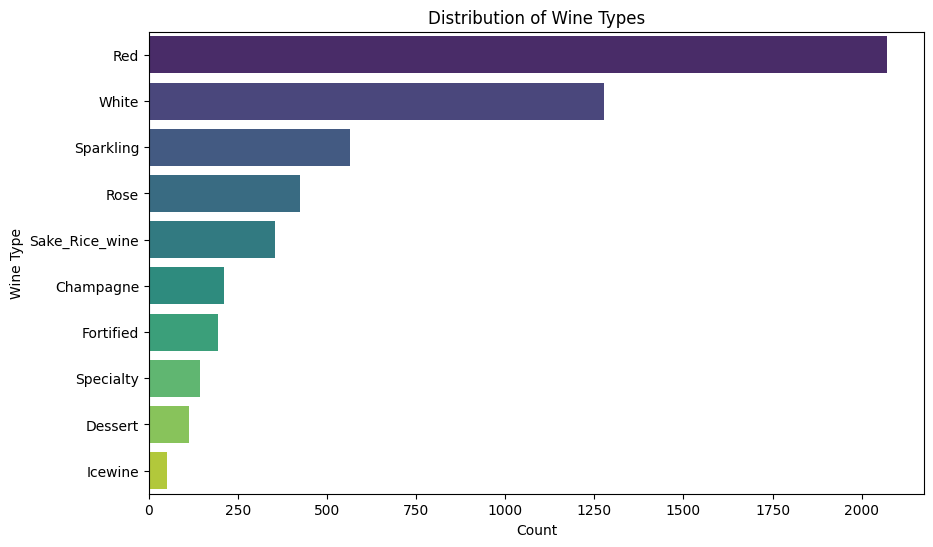

C:\Users\syune\AppData\Local\Temp\ipykernel_32196\11368527.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_json, y='Country', order=df_json['Country'].value_counts().index, palette='viridis')


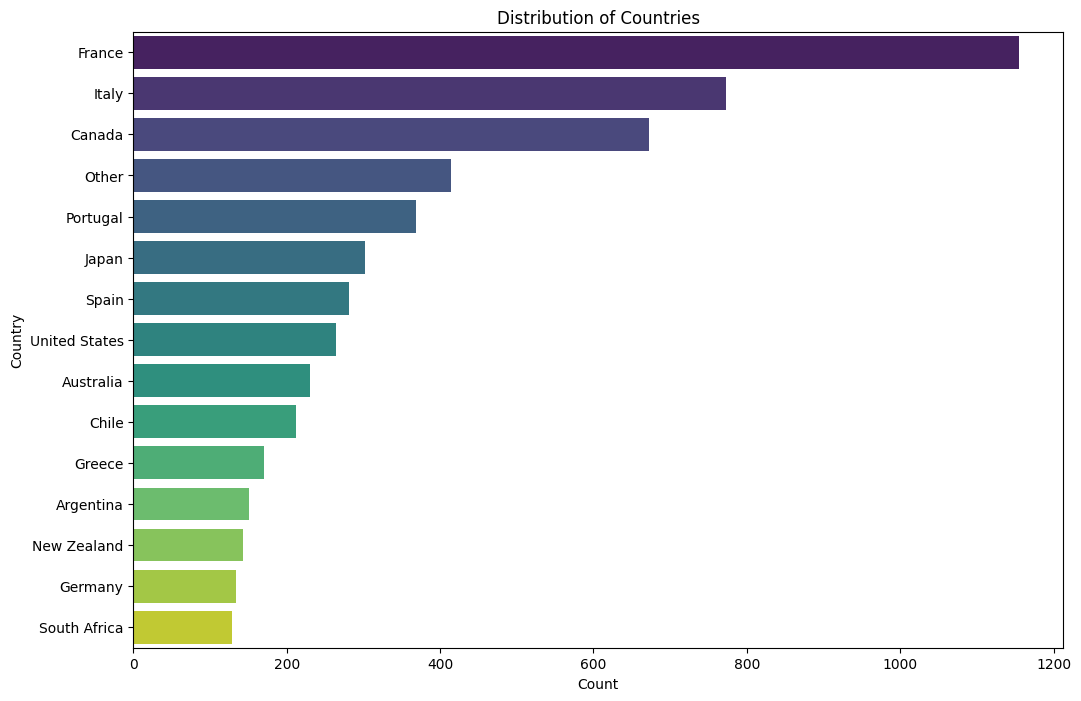

In [21]:
# Plotting the distribution of wine types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_json, y='Type', order=df_json['Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Wine Types')
plt.xlabel('Count')
plt.ylabel('Wine Type')
plt.show()

# Plotting the distribution of countries
plt.figure(figsize=(12, 8))
sns.countplot(data=df_json, y='Country', order=df_json['Country'].value_counts().index, palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()